In [1]:
import awkward as ak
import uproot
import numpy as np
from coffea.nanoevents import NanoEventsFactory, PFNanoAODSchema

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5

In [2]:
# a file containing 2018 ggF simulation
sample = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/ggF.root"

In [3]:
events = NanoEventsFactory.from_root(
    {sample: "/Events"},
    delayed=False,
    schemaclass=PFNanoAODSchema,
).events()

/uscms/home/jennetd/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/mapping/uproot.py:128: UserWarning: Found duplicate branch FatJetAK15SubJet_nBHadrons in <TTree 'Events' (1912 branches) at 0x7f63cd23da90>, taking first instance
  warnings.warn(
/uscms/home/jennetd/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/mapping/uproot.py:128: UserWarning: Found duplicate branch FatJetAK15SubJet_nCHadrons in <TTree 'Events' (1912 branches) at 0x7f63cd23da90>, taking first instance
  warnings.warn(
/uscms/home/jennetd/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/mapping/uproot.py:128: UserWarning: Found duplicate branch FatJetAK15_nBHadrons in <TTree 'Events' (1912 branches) at 0x7f63cd23da90>, taking first instance
  warnings.warn(
/uscms/home/jennetd/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/mapping/uproot.py:128: UserWarning: Found duplicate branch FatJetA

In [4]:
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 450)
                       & (abs(fatjets.eta) < 2.5)
                       & fatjets.isTight
                      ]

leadingjets = candidatejet[:, 0:2]

In [23]:
len(ak.flatten(leadingjets))

883

In [7]:
import fastjet

In [13]:
jetdef = fastjet.JetDefinition(
        fastjet.cambridge_algorithm, 0.8
    )
pf = ak.flatten(leadingjets.constituents.pf, axis=1)
cluster = fastjet.ClusterSequence(pf, jetdef)
softdrop_zcut10_beta0 = cluster.exclusive_jets_softdrop_grooming()

In [12]:
softdrop_zcut10_beta0

<Array [{constituents: [...], ...}, ..., {...}] type='883 * {constituents: ...'>

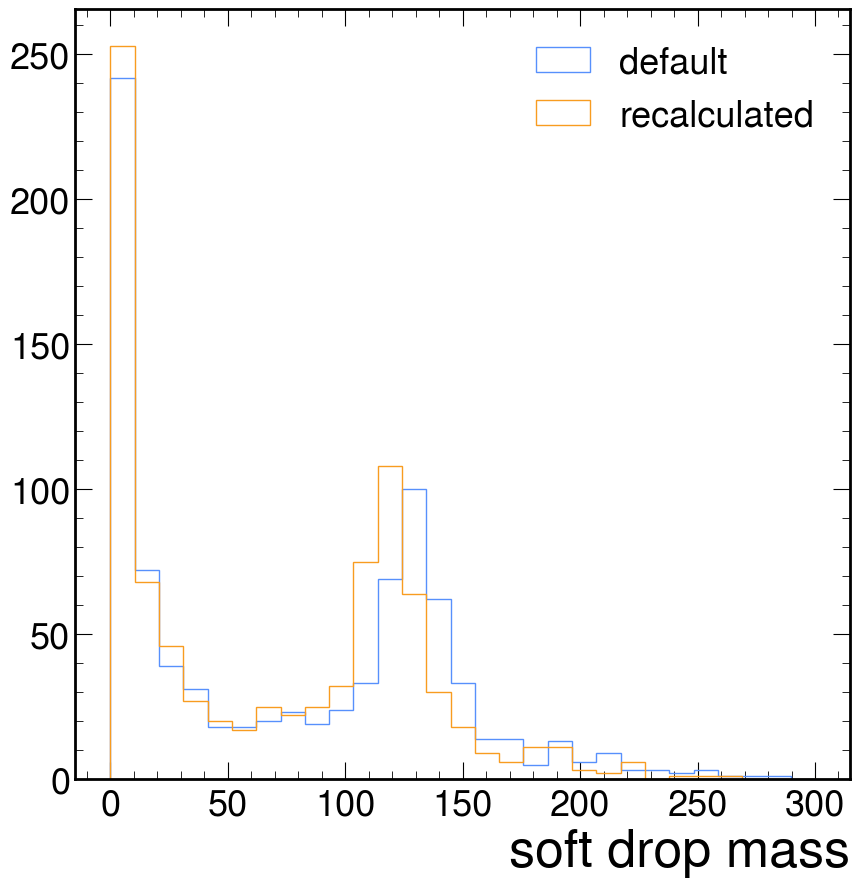

In [25]:
bins=np.linspace(0,300,30)
plt.hist(ak.flatten(leadingjets.msoftdrop),histtype='step',bins=bins,label='default');
plt.hist(softdrop_zcut10_beta0.msoftdrop,histtype='step',bins=bins,label='recalculated');
plt.legend(frameon=False)
plt.xlabel('soft drop mass')
plt.legend()

In [ ]:
leadingjets.constituents.pFCandsIdx

In [ ]:
softdrop_zcut10_beta1 = cluster.exclusive_jets_softdrop_grooming(beta=1)

In [ ]:
def check_not_none(a):
    print(len(a[~ak.is_none(a)]))
    
def return_not_none(a):
    return a[~ak.is_none(a)]

In [ ]:
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 200)
                       & (abs(fatjets.eta) < 2.5)
                       & fatjets.isTight
                      ]

leadingjets = candidatejet[:, 0:2]
            

In [ ]:
particleNetMD_Xbb = leadingjets.particleNetMD_Xbb
particleNetMD_Xcc = leadingjets.particleNetMD_Xcc
particleNetMD_Xqq = leadingjets.particleNetMD_Xqq
particleNetMD_QCD = leadingjets.particleNetMD_QCD

# ascending = true                                                                                                                                
indices = ak.argsort(particleNetMD_Xbb,axis=1)

# candidate jet is more b-like (lower CvB score)                                                                                                           
candidatejet = return_not_none(ak.firsts(leadingjets[indices[:, 1:2]]))
            
# second jet is more charm-like (larger CvB score)                                                                                                           
secondjet = return_not_none(ak.firsts(leadingjets[indices[:, 0:1]]))

In [ ]:
ddcvb = leadingjets.btagDDCvBV2

# ascending = true                                                                                                                                
indices = ak.argsort(ddcvb,axis=1)

# candidate jet is more b-like (lower CvB score)                                                                                                           
candidatejet_old = ak.firsts(leadingjets[indices[:, 1:2]])
            
# second jet is more charm-like (larger CvB score)                                                                                                           
secondjet_old = ak.firsts(leadingjets[indices[:, 0:1]])

In [ ]:
bins=np.linspace(0,1,11)

In [ ]:
particleNetMD_Xbb = candidatejet.particleNetMD_Xbb
particleNetMD_Xcc = candidatejet.particleNetMD_Xcc
particleNetMD_Xqq = candidatejet.particleNetMD_Xqq
particleNetMD_QCD = candidatejet.particleNetMD_QCD

plt.hist(particleNetMD_Xbb,histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc,histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq,histtype='step',bins=bins,label='Xqq');
plt.hist(particleNetMD_QCD,histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('particleNetMD')

In [ ]:
plt.hist(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq),histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq),histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc),histtype='step',bins=bins,label='Xqq');
#plt.hist(particleNetMD_QCD / (particleNetMD_Xbb + particleNetMD_QCD + particleNetMD_Xcc + particleNetMD_Xqq),histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('Transformed particleNetMD')

In [ ]:
plt.hist(candidatejet.particleNet_WvsQCD,histtype='step',bins=bins,label='WvsQCD');
plt.hist(candidatejet.particleNet_ZvsQCD,histtype='step',bins=bins,label='ZvsQCD');
plt.legend(frameon=False)
plt.xlabel('particleNet')

In [ ]:
particleNetMD_Xbb = secondjet.particleNetMD_Xbb
particleNetMD_Xcc = secondjet.particleNetMD_Xcc
particleNetMD_Xqq = secondjet.particleNetMD_Xqq
particleNetMD_QCD = secondjet.particleNetMD_QCD

plt.hist(particleNetMD_Xbb,histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc,histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq,histtype='step',bins=bins,label='Xqq');
plt.hist(particleNetMD_QCD,histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('particleNetMD')

In [ ]:
check_not_none(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq))
check_not_none(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq))
check_not_none(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc))

plt.hist(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq),histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq),histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc),histtype='step',bins=bins,label='Xqq');
#plt.hist(particleNetMD_QCD / (particleNetMD_Xbb + particleNetMD_QCD + particleNetMD_Xcc + particleNetMD_Xqq),histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('Transformed particleNetMD')

In [ ]:
plt.hist(secondjet.particleNet_WvsQCD,histtype='step',bins=bins,label='WvsQCD');
plt.hist(secondjet.particleNet_ZvsQCD,histtype='step',bins=bins,label='ZvsQCD');
plt.legend(frameon=False)
plt.xlabel('particleNet')

In [ ]:
candidatejet_diff = return_not_none(candidatejet.pt) - return_not_none(candidatejet_old.pt)
plt.hist(candidatejet_diff)

In [ ]:
secondjet_diff = return_not_none(secondjet.pt) - return_not_none(secondjet_old.pt)
plt.hist(secondjet_diff)

In [15]:
fastjet.__version__

'3.4.1.3'

In [17]:
ak.__version__

'2.6.4'

In [19]:
import coffea
coffea.__version__

'2024.5.0'